### Impoortng libraries 

In [62]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### Loading data set

In [63]:
digits=load_digits()


In [64]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
X.shape


(1797, 64)

In [65]:
n_samples = len(digits.target)
y = digits.target.reshape((n_samples, -1))
y.shape



(1797, 1)

### Ploting data set


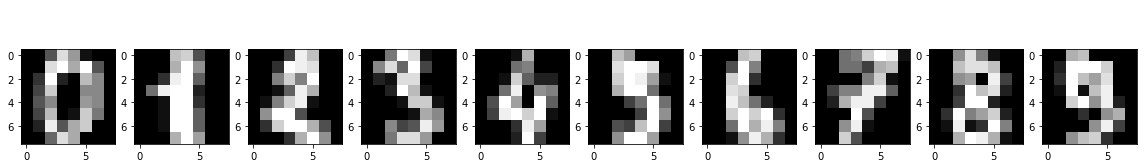

In [66]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1,10,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("traning: %i\n"% label,fontsize=20,color="white")


### model fiting 

In [67]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [68]:
print("train input data:",x_train.shape)
print("test input data:",x_test.shape)
print("train output data:",y_train.shape)
print("test output data:",y_test.shape)

train input data: (1437, 64)
test input data: (360, 64)
train output data: (1437, 1)
test output data: (360, 1)


In [69]:
# train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)
model

C:\Users\abdur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abdur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [70]:
model.predict((x_test[0:10]))

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Checking accuracy score 

In [71]:
# accuracy test 
score= model.score(x_test,y_test)
print('the accuracy score is: ',score)


the accuracy score is:  0.9666666666666667


In [75]:
#confusio matric 

from sklearn import metrics
prediction=model.predict(x_test)
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

### Ploting the dat6a in heat map for deeper understanding 

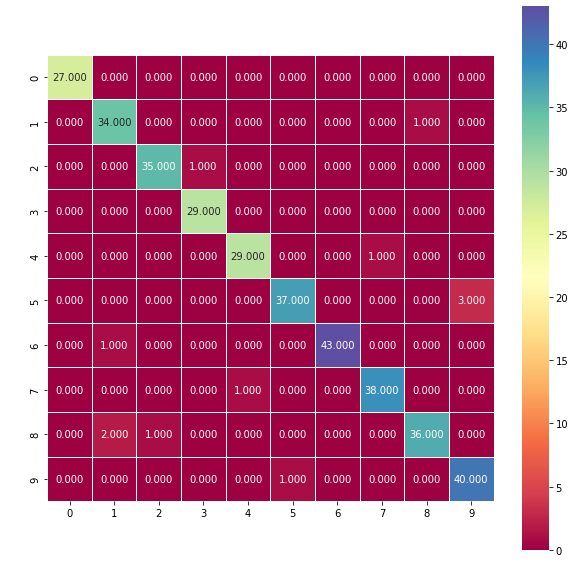

In [85]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=0.5,square=True,cmap="Spectral");
plt.ylabel('Actual output',color="white",size=20);
plt.xlabel('Predict output',color="white",size=20);
all_sample_titel='Accuracy score:{0}'.format(score)
plt.title(all_sample_titel,size=20,color="white");

In [86]:
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


### getting misclassfied lables

In [173]:
# getting misclassfied lables
import numpy as np
import matplotlib.pyplot as plt
index=0
misclassificationindexes=[]
for label,predict in zip (y_test,prediction):
    if label != predict:
        misclassificationindexes.append(index)
        index =+1




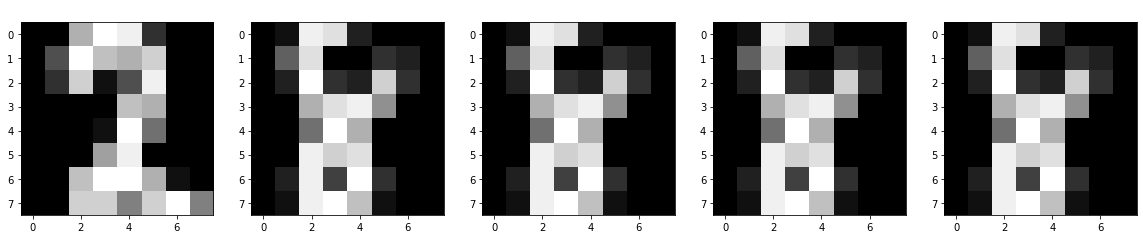

In [174]:
# plotting missclassification labels with known labels

plt.figure(figsize=(20,5))
for plotindex ,badindex in enumerate(misclassificationindexes[0:5]):
         plt.subplot(1,5,plotindex+1)
         plt.imshow(np.reshape(x_test[badindex],(8,8)),cmap=plt.cm.gray)
         plt.title("p:{},A:{}".format(prediction[badindex],y_test[badindex],fotsize=15),color="white")